# 4. Probability Distributions

A **probability distribution** is a mathematical function that describes the likelihood of obtaining the possible values that a random variable can take. In this notebook, we'll explore the most common discrete and continuous probability distributions using Python's `scipy.stats` library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('whitegrid')

## 4.1 Discrete Distributions

Discrete distributions describe the probabilities of outcomes for a discrete random variable.

### Binomial Distribution
- **Description:** Represents the number of successes in a fixed number of independent Bernoulli trials (e.g., coin flips).
- **Parameters:** `n` (number of trials), `p` (probability of success on a single trial).
- **Use Case:** What is the probability of getting exactly 7 heads in 10 coin flips?

P(X=7) in Binomial(10, 0.5): 0.1172


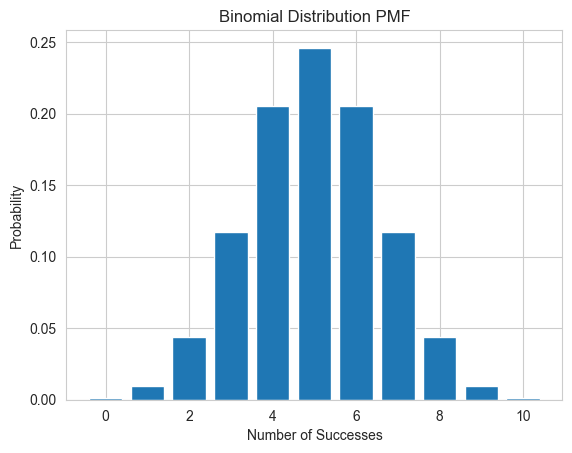

In [2]:
n = 10
p = 0.5
k = 7 # Number of successes

# Probability Mass Function (PMF) - P(X=k)
prob = stats.binom.pmf(k, n, p)
print(f"P(X=7) in Binomial(10, 0.5): {prob:.4f}")

# Plot the distribution
x = np.arange(0, n+1)
plt.bar(x, stats.binom.pmf(x, n, p))
plt.title('Binomial Distribution PMF')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

### Poisson Distribution
- **Description:** Represents the number of events occurring in a fixed interval of time or space, given a constant mean rate.
- **Parameter:** `λ` (lambda, the mean rate of events).
- **Use Case:** A call center receives an average of 5 calls per hour. What is the probability of receiving exactly 3 calls in the next hour?

P(X=3) in Poisson(5): 0.1404


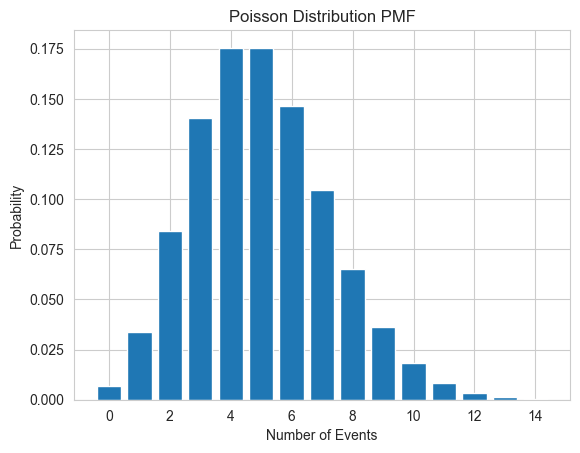

In [3]:
lambda_val = 5
k = 3

prob = stats.poisson.pmf(k, lambda_val)
print(f"P(X=3) in Poisson(5): {prob:.4f}")

# Plot the distribution
x = np.arange(0, 15)
plt.bar(x, stats.poisson.pmf(x, lambda_val))
plt.title('Poisson Distribution PMF')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.show()

## 4.2 Continuous Distributions

Continuous distributions describe the probabilities for a continuous random variable.

### Normal Distribution
- **Description:** The classic 'bell curve'. It's defined by its mean and standard deviation.
- **Parameters:** `μ` (mu, the mean), `σ` (sigma, the standard deviation).
- **Use Case:** Modeling natural phenomena like height, weight, and IQ scores.

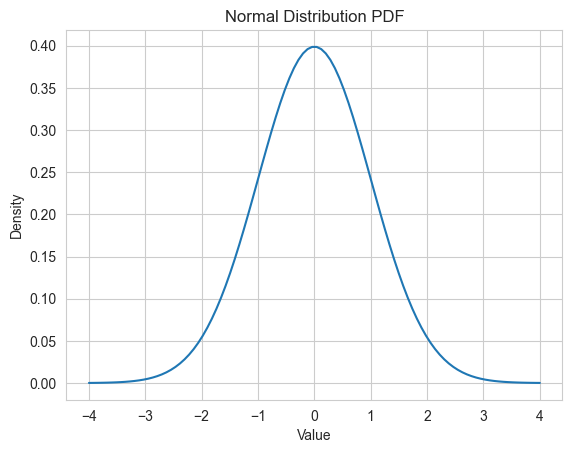

P(X <= 1) in N(0, 1): 0.8413


In [4]:
mu = 0
sigma = 1

# Probability Density Function (PDF) - The height of the curve
# For continuous distributions, P(X=k) is 0. We talk about ranges.
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Normal Distribution PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Cumulative Distribution Function (CDF) - P(X <= k)
prob_less_than_1 = stats.norm.cdf(1, mu, sigma)
print(f"P(X <= 1) in N(0, 1): {prob_less_than_1:.4f}")

### Standard Normal Distribution and Z-scores
A special case of the normal distribution with `μ=0` and `σ=1`. A **Z-score** measures how many standard deviations a data point is from the mean.
$$ Z = \frac{x - \mu}{\sigma} $$

In [5]:
# If heights are N(170, 10), what is the Z-score for a height of 185cm?
x = 185
mu_height = 170
sigma_height = 10

z_score = (x - mu_height) / sigma_height
print(f"The Z-score for 185cm is {z_score}")

The Z-score for 185cm is 1.5


### t-distribution
- **Description:** Similar to the normal distribution but with heavier tails. It's used when the sample size is small and/or the population standard deviation is unknown.
- **Parameter:** `df` (degrees of freedom).
- **Use Case:** Hypothesis testing with small samples (e.g., t-tests).

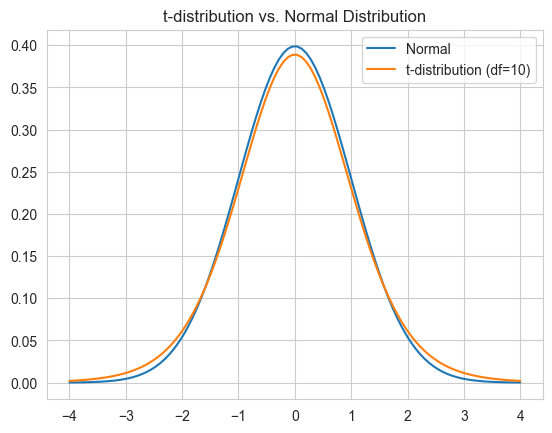

In [6]:
df = 10 # Degrees of freedom
x = np.linspace(-4, 4, 100)

plt.plot(x, stats.norm.pdf(x, 0, 1), label='Normal')
plt.plot(x, stats.t.pdf(x, df), label=f't-distribution (df={df})')
plt.title('t-distribution vs. Normal Distribution')
plt.legend()
plt.show()

### Chi-Square (χ²) Distribution
- **Description:** A distribution of the sum of squared standard normal deviates. It's skewed to the right.
- **Parameter:** `df` (degrees of freedom).
- **Use Case:** Chi-square tests for goodness-of-fit and independence.

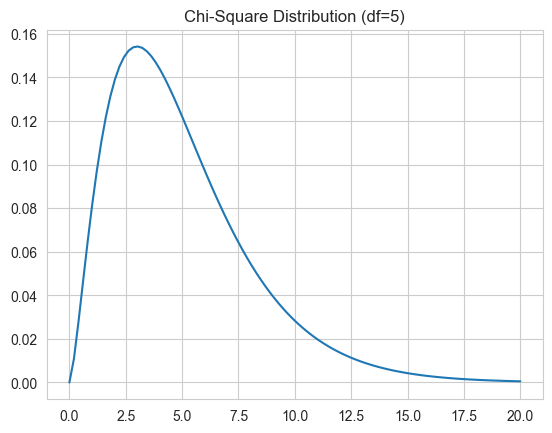

In [7]:
df = 5
x = np.linspace(0, 20, 100)

plt.plot(x, stats.chi2.pdf(x, df))
plt.title(f'Chi-Square Distribution (df={df})')
plt.show()